In [3]:
# import the libraries as shown below
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,DirectoryIterator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Skin-Disease-Analyzer/Dataset/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Skin-Disease-Analyzer/Dataset/test'

In [6]:
model_ = InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3]
    )

219055592/219055592 [==============================] - 1s 0us/step


In [7]:
for layer in model_.layers:
    layer.trainable = False

In [8]:
x = Flatten()(model_.output)

In [9]:
prediction = Dense(19, activation='softmax')(x)
model = Model(inputs=model_.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = DirectoryIterator('/content/drive/MyDrive/Colab Notebooks/Skin-Disease-Analyzer/Dataset/train',
                                              train_datagen,
                                                          target_size = (224, 224),
                                                          batch_size = 32,
                                                          class_mode = 'categorical')

# training_set = train_datagen.flow_from_directory('Dataset/train',
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

Found 2609 images belonging to 19 classes.


In [12]:
test_set = DirectoryIterator('/content/drive/MyDrive/Colab Notebooks/Skin-Disease-Analyzer/Dataset/test', test_datagen,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 691 images belonging to 19 classes.


In [13]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
82/82 [==============================] - 718s 9s/step - loss: 10.4681 - accuracy: 0.2787 - val_loss: 6.3083 - val_accuracy: 0.3763
Epoch 2/30
82/82 [==============================] - 51s 622ms/step - loss: 5.4926 - accuracy: 0.4216 - val_loss: 9.2086 - val_accuracy: 0.4110
Epoch 3/30
82/82 [==============================] - 51s 624ms/step - loss: 5.0400 - accuracy: 0.4780 - val_loss: 7.3339 - val_accuracy: 0.3864
Epoch 4/30
82/82 [==============================] - 51s 625ms/step - loss: 3.8383 - accuracy: 0.5412 - val_loss: 6.8448 - val_accuracy: 0.4226
Epoch 5/30
82/82 [==============================] - 52s 639ms/step - loss: 3.5103 - accuracy: 0.5719 - val_loss: 6.8874 - val_accuracy: 0.4645
Epoch 6/30
82/82 [==============================] - 58s 711ms/step - loss: 3.2127 - accuracy: 0.6106 - val_loss: 7.2340 - val_accuracy: 0.4732
Epoch 7/30
82/82 [==============================] - 55s 667ms/step - loss: 2.7779 - accuracy: 0.6550 - val_loss: 7.9164 - val_accuracy: 0.4819


In [22]:
model.save('/content/drive/MyDrive/Colab Notebooks/Skin-Disease-Analyzer/resnet-model1.h5')
# model.save('resnetmodel.bin')
# y_pred = model.predict(test_set)

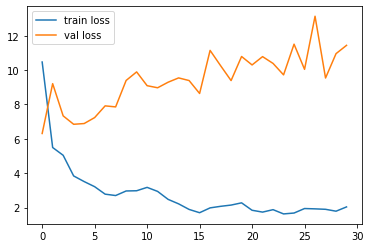

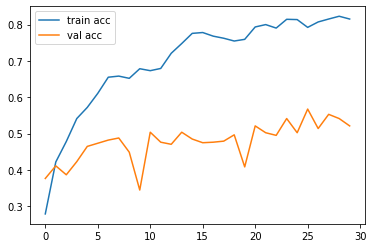

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# import numpy as np
# y_pred = np.argmax(y_pred, axis=1)
# y_pred

array([ 0,  0,  1,  7, 12,  0,  0,  0, 10,  0,  0, 18, 13,  0,  4,  1,  0,
        0, 10, 18,  1,  2,  0,  4, 13,  0,  1,  0,  0,  0,  0,  0, 12, 18,
        0,  9,  0,  0, 11, 17,  0, 18,  1,  0,  0,  1, 18,  8,  0,  9,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  1,  0, 13,  0,  2,  4,  0,
       13,  0,  1, 18,  0, 18,  0,  2,  0,  0,  0, 18,  0,  1, 16,  4,  7,
        0,  0,  4, 11, 17,  0,  0,  2,  2,  0, 10, 18,  5,  0,  0,  0, 18,
        1,  7, 12,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1, 12,  0, 10, 18,
        1,  0,  0,  0,  0,  1, 13,  1,  0, 18,  0,  0,  4,  0, 14, 13, 13,
        0,  0,  4,  0,  0,  0,  0,  0, 10,  3,  0,  7, 10,  0, 13,  0,  0,
        0,  0,  0, 13,  0,  0,  2,  0,  0,  7,  0,  0,  1,  1,  0,  1,  0,
        0,  4, 13,  2, 18, 18,  0, 13,  0,  0,  0, 18,  0,  8, 13, 12,  0,
       13,  1,  2,  0,  0,  0,  0,  7,  1,  0, 17,  1,  0,  0,  1,  1,  1,
       18, 11,  0,  8,  1,  0, 11,  0,  0,  0,  0,  0,  0,  0,  2,  0, 18,
       18,  0,  2,  1,  2